In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./final_result.csv",index_col=0,parse_dates=["ds"])
data

,ds,y,prophet,TCN,RNN,LSTM,ARIMA,GRU,TCN-Prophet
0,2021-07-03 01:00:00,0.597219,0.610797,0.580292,0.603026,0.603009,0.600584,0.604435,0.607891
1,2021-07-03 02:00:00,0.618928,0.642740,0.597894,0.626438,0.624958,0.623070,0.628965,0.638468
2,2021-07-03 03:00:00,0.663583,0.679314,0.634995,0.657364,0.653864,0.661592,0.660048,0.675092
3,2021-07-03 04:00:00,0.717383,0.708772,0.673650,0.694046,0.688473,0.702041,0.695185,0.705426
4,2021-07-03 05:00:00,0.771838,0.744462,0.713423,0.733624,0.726427,0.739611,0.731576,0.741505
...,...,...,...,...,...,...,...,...,...
1435,2021-08-31 20:00:00,0.681087,0.688483,0.634238,0.611561,0.591231,0.580097,0.625666,0.683316
1436,2021-08-31 21:00:00,0.660744,0.661254,0.619213,0.596926,0.566846,0.557350,0.607854,0.657249
1437,2021-08-31 22:00:00,0.649041,0.661117,0.614370,0.589256,0.550675,0.539509,0.596848,0.656663
1438,2021-08-31 23:00:00,0.646729,0.664052,0.616129,0.589428,0.543591,0.530948,0.593612,0.659486


In [3]:
data.columns

Index(['ds', 'y', 'prophet', 'TCN', 'RNN', 'LSTM', 'ARIMA', 'GRU',
       'TCN-Prophet'],
      dtype='object')

In [4]:
w_1 =sum((data["y"]-data["prophet"])*data["TCN"])/sum((data["TCN"]-data["prophet"])*data["TCN"])
w_1

0.09526580313402273

In [5]:
w_2 =sum((data["TCN"]-data["y"])*data["TCN"])/sum((data["TCN"]-data["prophet"])*data["TCN"])
w_2

0.9047341968659783

In [6]:
data["TCN-Prophet"] = w_1*data["TCN"]+(1-w_1)*data["prophet"]
data

,ds,y,prophet,TCN,RNN,LSTM,ARIMA,GRU,TCN-Prophet
0,2021-07-03 01:00:00,0.597219,0.610797,0.580292,0.603026,0.603009,0.600584,0.604435,0.607891
1,2021-07-03 02:00:00,0.618928,0.642740,0.597894,0.626438,0.624958,0.623070,0.628965,0.638468
2,2021-07-03 03:00:00,0.663583,0.679314,0.634995,0.657364,0.653864,0.661592,0.660048,0.675092
3,2021-07-03 04:00:00,0.717383,0.708772,0.673650,0.694046,0.688473,0.702041,0.695185,0.705426
4,2021-07-03 05:00:00,0.771838,0.744462,0.713423,0.733624,0.726427,0.739611,0.731576,0.741505
...,...,...,...,...,...,...,...,...,...
1435,2021-08-31 20:00:00,0.681087,0.688483,0.634238,0.611561,0.591231,0.580097,0.625666,0.683316
1436,2021-08-31 21:00:00,0.660744,0.661254,0.619213,0.596926,0.566846,0.557350,0.607854,0.657249
1437,2021-08-31 22:00:00,0.649041,0.661117,0.614370,0.589256,0.550675,0.539509,0.596848,0.656663
1438,2021-08-31 23:00:00,0.646729,0.664052,0.616129,0.589428,0.543591,0.530948,0.593612,0.659486


In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
MSE = mean_squared_error(data["y"], data["TCN-Prophet"])
MAE = mean_absolute_error(data["y"],data["TCN-Prophet"])
MAPE = mean_absolute_percentage_error(data["y"],data["TCN-Prophet"])
print("MSE=",MSE)
print("MAE=",MAE)
print("MAPE=",MAPE)

# MSE= 0.0004524059601280789
# MAE= 0.015920211776395292
# MAPE= 0.021412021073694158

MSE= 0.0004524059596032706
MAE= 0.01592021176073236
MAPE= 0.021412021051593594


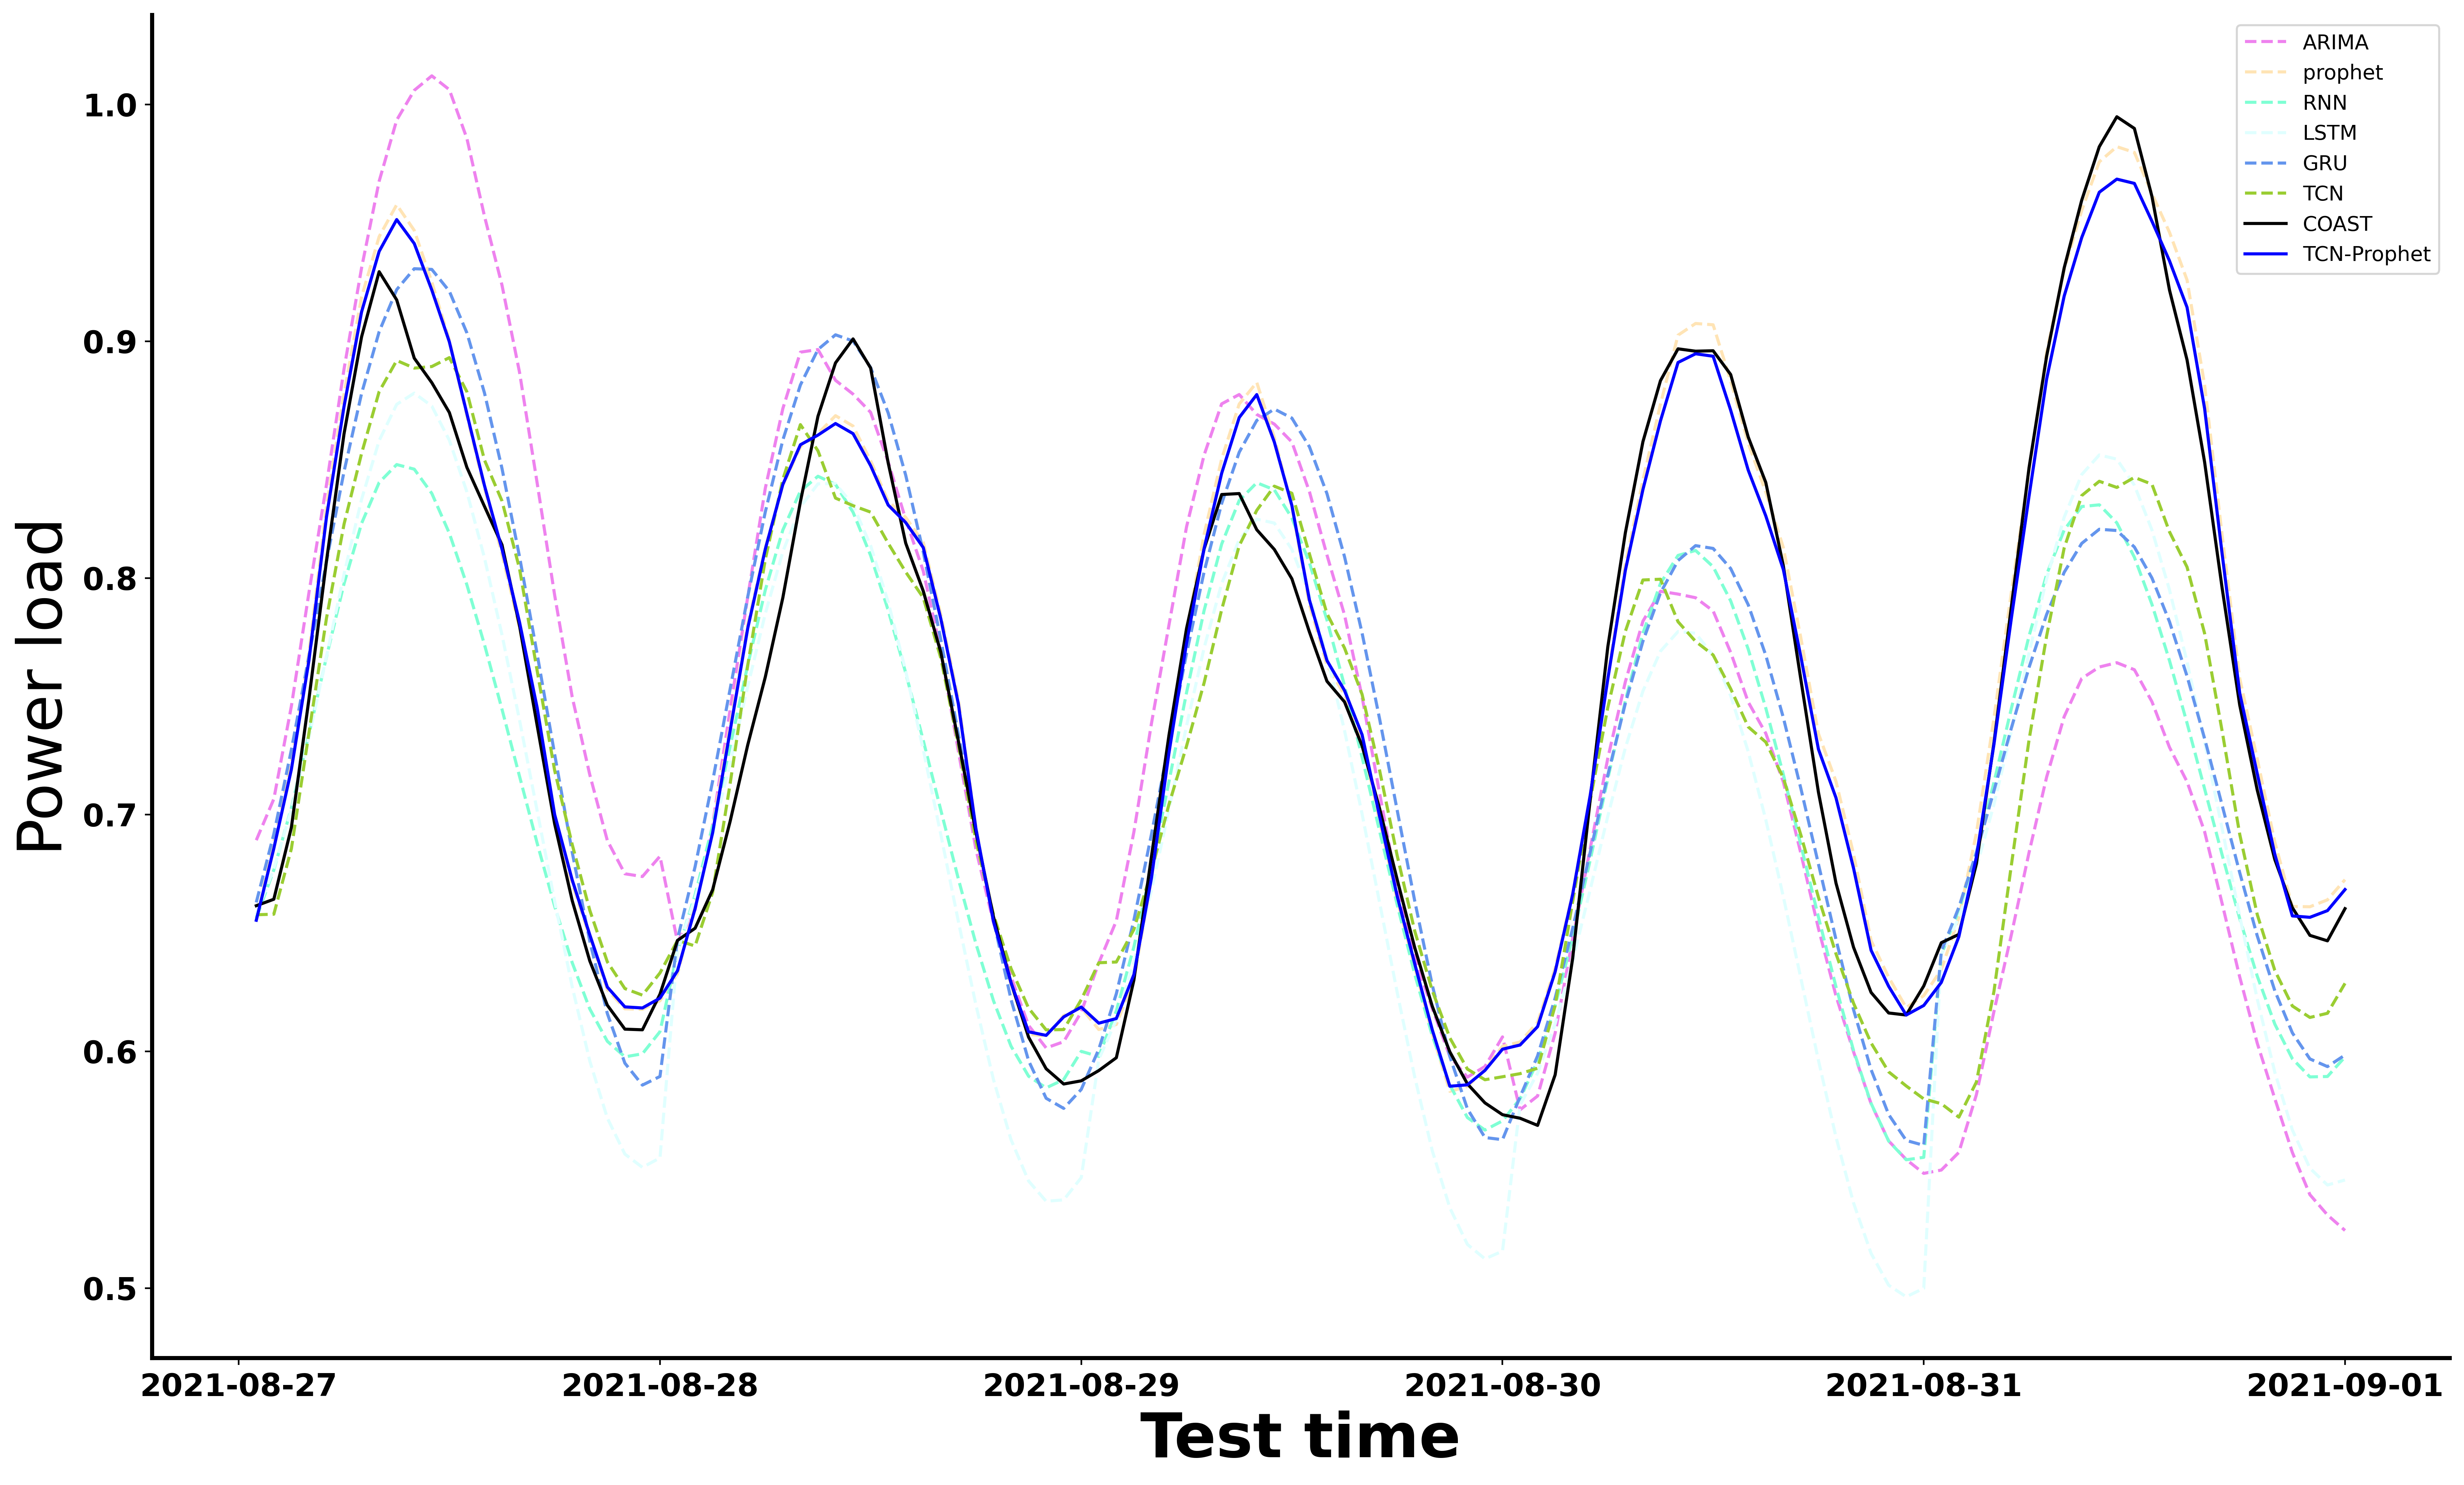

In [8]:
data = data.iloc[-24*5:,:]


fig = plt.figure(figsize=(20,12),dpi=400)
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

f1 = plt.plot(data["ds"],data["ARIMA"],label="ARIMA",c='violet',linestyle='--')
f2 = plt.plot(data["ds"],data["prophet"],label="prophet",c='moccasin',linestyle='--')
f3 = plt.plot(data["ds"],data["RNN"],label="RNN",c='aquamarine',linestyle='--')
f4 = plt.plot(data["ds"],data["LSTM"],label="LSTM",c='lightcyan',linestyle='--')
f5 = plt.plot(data["ds"],data["GRU"],label="GRU",c='cornflowerblue',linestyle='--')
f6 = plt.plot(data["ds"],data["TCN"],label="TCN",c='yellowgreen',linestyle='--')

f7 = plt.plot(data["ds"],data["y"],label='COAST',c='k')
f8 = plt.plot(data["ds"],data["TCN-Prophet"],label="TCN-Prophet",c='b')
# plt.fill_between(data["ds"],data["y"],color='b')

plt.xlabel('Test time', fontsize=30,fontweight='bold')
plt.ylabel('Power load', fontsize=30)
plt.xticks(fontsize=15,weight='bold')
plt.yticks(fontsize=15,weight='bold')
plt.legend()
plt.show()

In [9]:
# fig.savefig("concate_new.svg",dpi=400,format="svg")

In [10]:
# fig = plt.figure(figsize=(20,12),dpi=400)

# f1 = plt.plot(data["ds"],data["ARIMA"],label="ARIMA",c='violet',linestyle='--')
# f2 = plt.plot(data["ds"],data["prophet"],label="prophet",c='moccasin',linestyle='--')
# f3 = plt.plot(data["ds"],data["RNN"],label="RNN",c='aquamarine',linestyle='--')
# f4 = plt.plot(data["ds"],data["LSTM"],label="LSTM",c='lightcyan',linestyle='--')
# f5 = plt.plot(data["ds"],data["GRU"],label="GRU",c='cornflowerblue',linestyle='--')
# f6 = plt.plot(data["ds"],data["TCN"],label="TCN",c='yellowgreen',linestyle='--')

# f7 = plt.plot(data["ds"],data["y"],label='COAST',c='k')
# f8 = plt.plot(data["ds"],data["TCN-Prophet"],label="TCN-Prophet",c='b')
# plt.xlabel('Test time', fontsize=20)
# plt.ylabel('Power load after normalization', fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.legend(loc='lower center')
# plt.show()

In [11]:
data.reset_index(drop=True,inplace=True)
data

,ds,y,prophet,TCN,RNN,LSTM,ARIMA,GRU,TCN-Prophet
0,2021-08-27 01:00:00,0.661565,0.655184,0.657738,0.656390,0.657869,0.689242,0.662974,0.655427
1,2021-08-27 02:00:00,0.664301,0.688701,0.657983,0.676686,0.677192,0.706652,0.691863,0.685774
2,2021-08-27 03:00:00,0.694641,0.722683,0.685647,0.702885,0.702202,0.745860,0.727407,0.719155
3,2021-08-27 04:00:00,0.748836,0.768332,0.734551,0.733947,0.732723,0.793760,0.766865,0.765113
4,2021-08-27 05:00:00,0.807195,0.830254,0.783027,0.766697,0.766895,0.839425,0.807064,0.825755
...,...,...,...,...,...,...,...,...,...
115,2021-08-31 20:00:00,0.681087,0.688483,0.634238,0.611561,0.591231,0.580097,0.625666,0.683316
116,2021-08-31 21:00:00,0.660744,0.661254,0.619213,0.596926,0.566846,0.557350,0.607854,0.657249
117,2021-08-31 22:00:00,0.649041,0.661117,0.614370,0.589256,0.550675,0.539509,0.596848,0.656663
118,2021-08-31 23:00:00,0.646729,0.664052,0.616129,0.589428,0.543591,0.530948,0.593612,0.659486


In [12]:
# x=data.iloc[0,0]
# ymax = data.iloc[0,1]
# data["y"][0]
# print(ymax,data["y"][0])

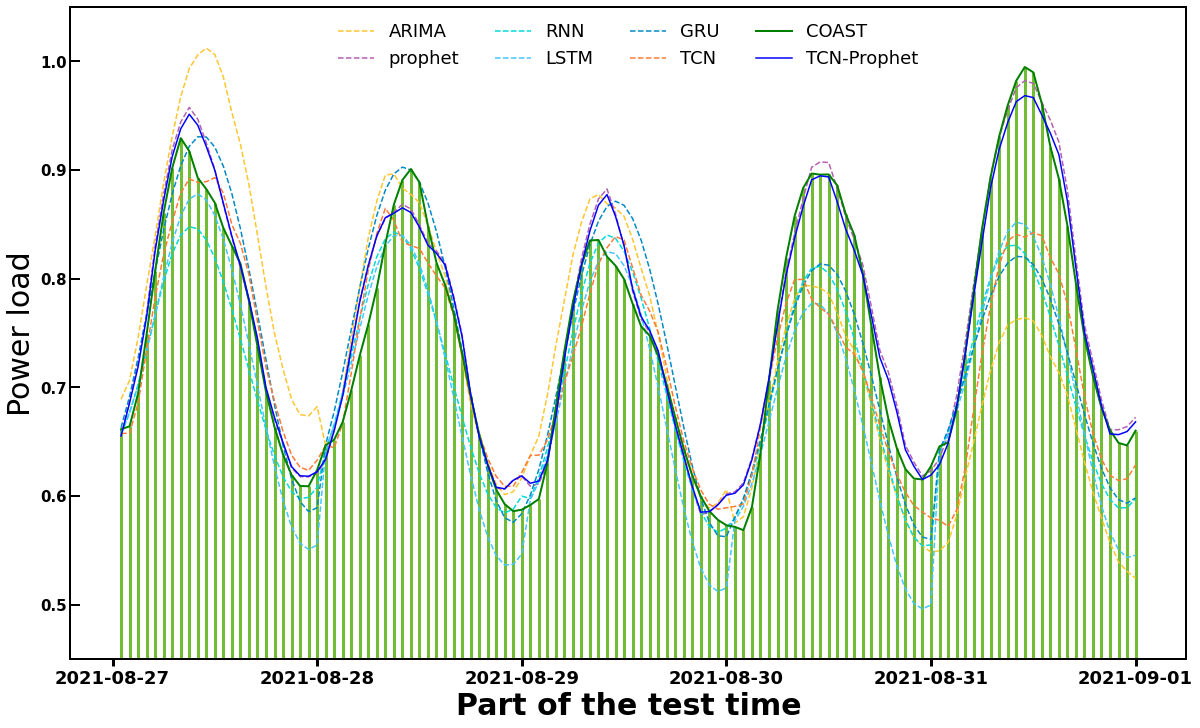

In [13]:
plt.figure(figsize=(20,12))

ax = plt.subplot(fc='white')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# clist= ['#FD6D5A', '#FEB40B', '#6DC354', '#994487', '#518CD8', '#443295','#264653', '#2A9D8F', '#E9C46A']
clist = ['#fec52e','#b45fb0','#00d9d9','#44c5ff','#0089c6','#ff7a35']
for i in range(len(data)):
    x=data.iloc[i,0]
    ymax = data.iloc[i,1]
    plt.vlines(x=x, ymin=0, ymax=ymax,colors='#72bd33',linewidth=3)
    
plt.tick_params(
                axis='x',
                direction='out',
                length=7,#tick长度
                width=3,#tick的宽度 
                labelsize = 10

)
plt.tick_params(
                axis='y',
                direction='in',
                length=10,#tick长度
                width=2,#tick的宽度 
                labelsize = 10

)
    
# f1 = plt.plot(data["ds"],data["ARIMA"],label="ARIMA",c='violet',linestyle='--')
# f2 = plt.plot(data["ds"],data["prophet"],label="prophet",c='moccasin',linestyle='--')
# f3 = plt.plot(data["ds"],data["RNN"],label="RNN",c='aquamarine',linestyle='--')
# f4 = plt.plot(data["ds"],data["LSTM"],label="LSTM",c='lightcyan',linestyle='--')
# f5 = plt.plot(data["ds"],data["GRU"],label="GRU",c='cornflowerblue',linestyle='--')
# f6 = plt.plot(data["ds"],data["TCN"],label="TCN",c='yellowgreen',linestyle='--')

# f7 = plt.plot(data["ds"],data["y"],label='COAST',c='k')
# f8 = plt.plot(data["ds"],data["TCN-Prophet"],label="TCN-Prophet",c='b')
f1 = plt.plot(data["ds"],data["ARIMA"],label="ARIMA",c=clist[0],linestyle='--')
f2 = plt.plot(data["ds"],data["prophet"],label="prophet",c=clist[1],linestyle='--')
f3 = plt.plot(data["ds"],data["RNN"],label="RNN",c=clist[2],linestyle='--')
f4 = plt.plot(data["ds"],data["LSTM"],label="LSTM",c=clist[3],linestyle='--')
f5 = plt.plot(data["ds"],data["GRU"],label="GRU",c=clist[4],linestyle='--')
f6 = plt.plot(data["ds"],data["TCN"],label="TCN",c=clist[5],linestyle='--')
f7 = plt.plot(data["ds"],data["y"],label='COAST',c='green',linewidth=2)
f8 = plt.plot(data["ds"],data["TCN-Prophet"],label="TCN-Prophet",c='b')


plt.xlabel('Part of the test time', fontsize=30,fontweight='bold')
plt.ylabel('Power load', fontsize=30)
plt.xticks(fontsize=18,weight='bold')
plt.yticks(fontsize=15,weight='bold')

plt.ylim(0.45,1.05)
plt.legend(ncol=4,loc='upper center',fontsize=18,frameon=False)  #去掉图例边框
# ax.spines['bottom'].set_linewidth(3);###设置底部坐标轴的粗细
# ax.spines['left'].set_linewidth(3);####设置左边坐标轴的粗细    

# plt.show()
# plt.savefig("./img/power_load.png",dpi=400)

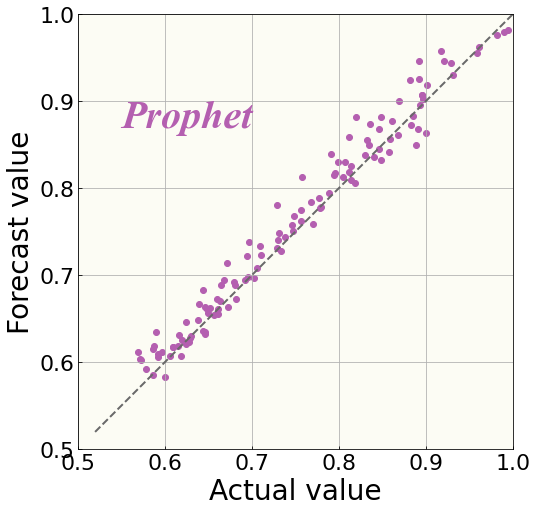

In [43]:
plt.figure(figsize=(8,8))
ax =plt.subplot(fc='#fcfcf4')
plt.tick_params(
    direction='in'
)

x = np.linspace(0.52,1,50)
ax.plot(x,x,linestyle='--',c='dimgray',linewidth=2)

ax.scatter(data["y"],data.iloc[:,2],c=clist[1],linewidths=1)

plt.xlim(0.5,1)
plt.ylim(0.5,1)
my_xticks = np.arange(0.5,1.01,0.1)
my_yticks = np.arange(0.5,1.01,0.1)
plt.xticks(my_xticks,fontsize=22) 
plt.yticks(my_yticks,fontsize=22)

plt.xlabel('Actual value', fontsize=28)
plt.ylabel('Forecast value', fontsize=28)

# ax = plt.gca()
ax.set_aspect(1)#xy轴等间距
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['right'].set_color('none')


plt.text(0.55,0.87,s="Prophet",c=clist[1],fontsize=40,fontweight='bold',fontproperties='Times New Roman',fontstyle='italic')
plt.grid()
# plt.show()

# plt.savefig("./img2/corr_prophet.png",dpi=100)

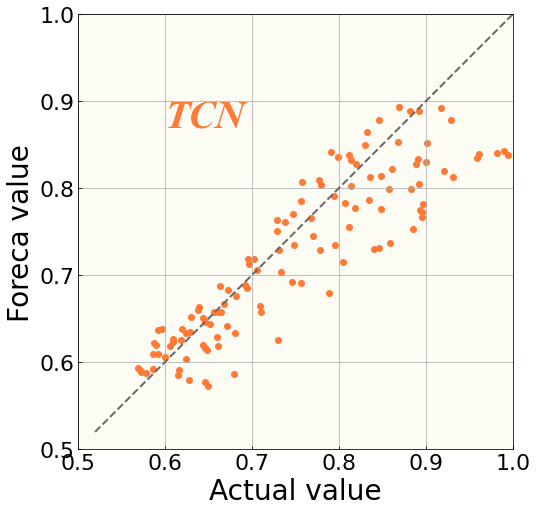

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(fc='#fcfcf4')
plt.tick_params(
    direction='in'
)

x = np.linspace(0.52,1,50)
plt.plot(x,x,linestyle='--',c='dimgray',linewidth=2)

plt.scatter(data["y"],data.iloc[:,3],c=clist[5],linewidths=1)

plt.xlim(0.5,1)
plt.ylim(0.5,1)
my_xticks = np.arange(0.5,1.01,0.1)
my_yticks = np.arange(0.5,1.01,0.1)
plt.xticks(my_xticks,fontsize=22) 
plt.yticks(my_yticks,fontsize=22)

plt.xlabel('Actual value', fontsize=28)
plt.ylabel('Foreca value', fontsize=28)

ax = plt.gca()
ax.set_aspect(1)#xy轴等间距
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['right'].set_color('none')


plt.text(0.6,0.87,s="TCN",c=clist[5],fontsize=40,fontweight='bold',fontproperties='Times New Roman',fontstyle='italic')
plt.grid()
# plt.show()

# plt.savefig("./img2/corr_TCN.png",dpi=100)

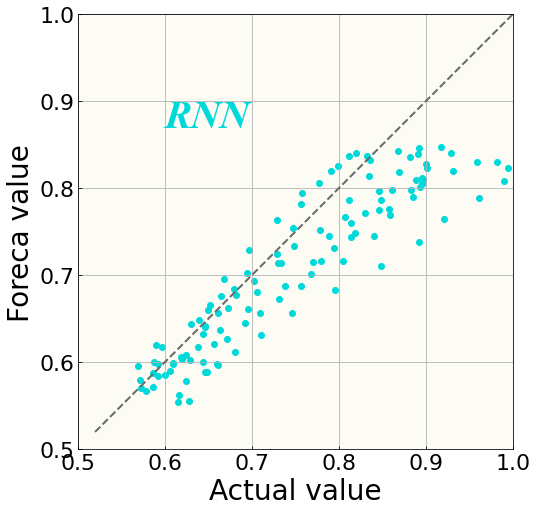

In [46]:
plt.figure(figsize=(8,8))
plt.subplot(fc='#fcfcf4')
plt.tick_params(
    direction='in'
)

x = np.linspace(0.52,1,50)
plt.plot(x,x,linestyle='--',c='dimgray',linewidth=2)


#更改
plt.scatter(data["y"],data.iloc[:,4],c=clist[2],linewidths=1)

plt.xlim(0.5,1)
plt.ylim(0.5,1)
my_xticks = np.arange(0.5,1.01,0.1)
my_yticks = np.arange(0.5,1.01,0.1)
plt.xticks(my_xticks,fontsize=22) 
plt.yticks(my_yticks,fontsize=22)

plt.xlabel('Actual value', fontsize=28)
plt.ylabel('Foreca value', fontsize=28)

ax = plt.gca()
ax.set_aspect(1)#xy轴等间距
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['right'].set_color('none')

#更改
plt.text(0.6,0.87,s="RNN",c=clist[2],fontsize=40,fontweight='bold',fontproperties='Times New Roman',fontstyle='italic')
plt.grid()
# plt.show()

# plt.savefig("./img2/corr_RNN.png",dpi=100)

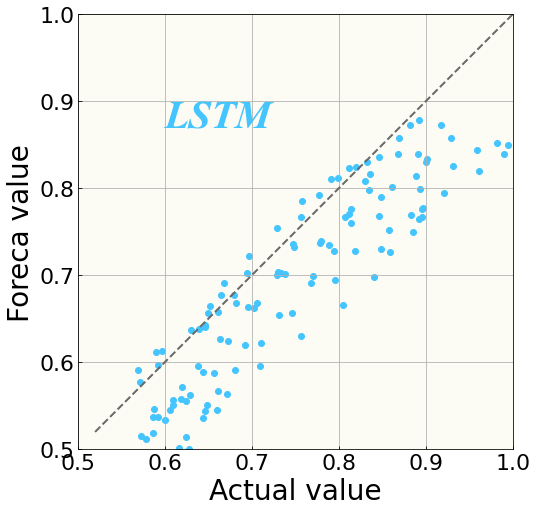

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(fc='#fcfcf4')
plt.tick_params(
    direction='in'
)

x = np.linspace(0.52,1,50)
plt.plot(x,x,linestyle='--',c='dimgray',linewidth=2)


#更改
plt.scatter(data["y"],data.iloc[:,5],c=clist[3],linewidths=1)

plt.xlim(0.5,1)
plt.ylim(0.5,1)
my_xticks = np.arange(0.5,1.01,0.1)
my_yticks = np.arange(0.5,1.01,0.1)
plt.xticks(my_xticks,fontsize=22) 
plt.yticks(my_yticks,fontsize=22)

plt.xlabel('Actual value', fontsize=28)
plt.ylabel('Foreca value', fontsize=28)

ax = plt.gca()
ax.set_aspect(1)#xy轴等间距
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['right'].set_color('none')

#更改
plt.text(0.6,0.87,s="LSTM",c=clist[3],fontsize=40,fontweight='bold',fontproperties='Times New Roman',fontstyle='italic')
plt.grid()
# plt.show()

# plt.savefig("./img2/corr_LSTM.png",dpi=100)

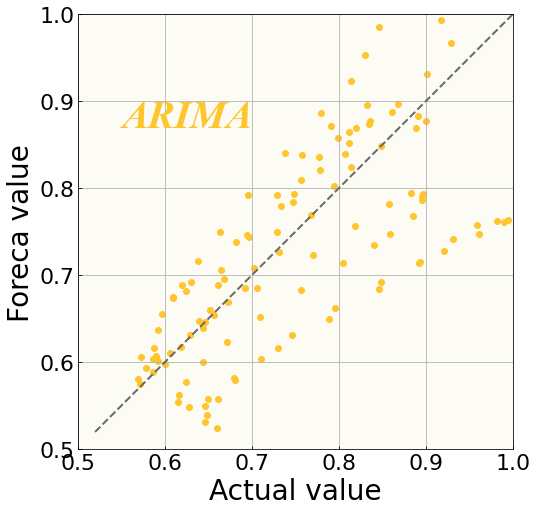

In [48]:
plt.figure(figsize=(8,8))
plt.subplot(fc='#fcfcf4')
plt.tick_params(
    direction='in'
)

x = np.linspace(0.52,1,50)
plt.plot(x,x,linestyle='--',c='dimgray',linewidth=2)


#更改
plt.scatter(data["y"],data.iloc[:,6],c=clist[0],linewidths=1)

plt.xlim(0.5,1)
plt.ylim(0.5,1)
my_xticks = np.arange(0.5,1.01,0.1)
my_yticks = np.arange(0.5,1.01,0.1)
plt.xticks(my_xticks,fontsize=22) 
plt.yticks(my_yticks,fontsize=22)

plt.xlabel('Actual value', fontsize=28)
plt.ylabel('Foreca value', fontsize=28)

ax = plt.gca()
ax.set_aspect(1)#xy轴等间距
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['right'].set_color('none')

#更改
plt.text(0.55,0.87,s="ARIMA",c=clist[0],fontsize=40,fontweight='bold',fontproperties='Times New Roman',fontstyle='italic')
plt.grid()
# plt.show()

# plt.savefig("./img2/corr_ARIMA.png",dpi=100)

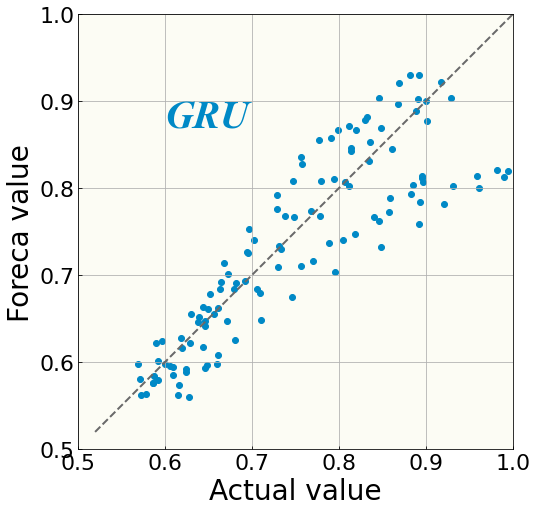

In [49]:
plt.figure(figsize=(8,8))
plt.subplot(fc='#fcfcf4')
plt.tick_params(
    direction='in'
)

x = np.linspace(0.52,1,50)
plt.plot(x,x,linestyle='--',c='dimgray',linewidth=2)


#更改
c='#0089c6'
plt.scatter(data["y"],data.iloc[:,7],c=c,linewidths=1)

plt.xlim(0.5,1)
plt.ylim(0.5,1)
my_xticks = np.arange(0.5,1.01,0.1)
my_yticks = np.arange(0.5,1.01,0.1)
plt.xticks(my_xticks,fontsize=22) 
plt.yticks(my_yticks,fontsize=22)

plt.xlabel('Actual value', fontsize=28)
plt.ylabel('Foreca value', fontsize=28)

ax = plt.gca()
ax.set_aspect(1)#xy轴等间距
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['right'].set_color('none')

#更改
plt.text(0.6,0.87,s="GRU",c=c,fontsize=40,fontweight='bold',fontproperties='Times New Roman',fontstyle='italic')
plt.grid()
# plt.show()

# plt.savefig("./img2/corr_GRU.png",dpi=100)

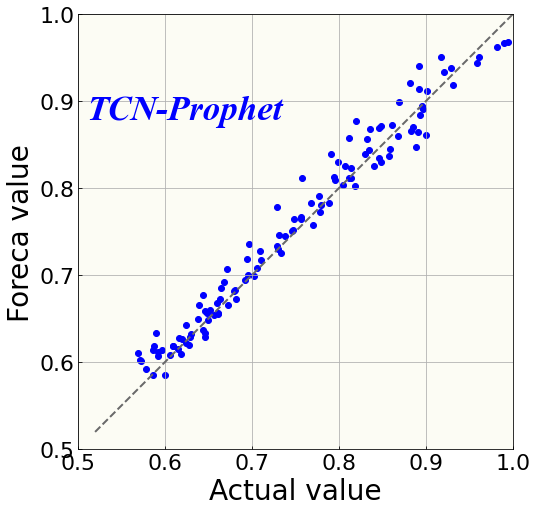

In [50]:
plt.figure(figsize=(8,8))
plt.subplot(fc='#fcfcf4')
plt.tick_params(
    direction='in'
)

x = np.linspace(0.52,1,50)
plt.plot(x,x,linestyle='--',c='dimgray',linewidth=2)


#更改
c='b'
plt.scatter(data["y"],data.iloc[:,8],c=c,linewidths=1)

plt.xlim(0.5,1)
plt.ylim(0.5,1)
my_xticks = np.arange(0.5,1.01,0.1)
my_yticks = np.arange(0.5,1.01,0.1)
plt.xticks(my_xticks,fontsize=22) 
plt.yticks(my_yticks,fontsize=22)

plt.xlabel('Actual value', fontsize=28)
plt.ylabel('Foreca value', fontsize=28)

ax = plt.gca()
ax.set_aspect(1)#xy轴等间距
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['right'].set_color('none')

#更改
plt.text(0.51,0.88,s="TCN-Prophet",c=c,fontsize=35,fontweight='bold',fontproperties='Times New Roman',fontstyle='italic')
plt.grid()
# plt.show()

# plt.savefig("./img2/corr_TCN-Prophet.png",dpi=100)